Jarak dari F ke A: 16
Jalur: F -> C -> D -> A



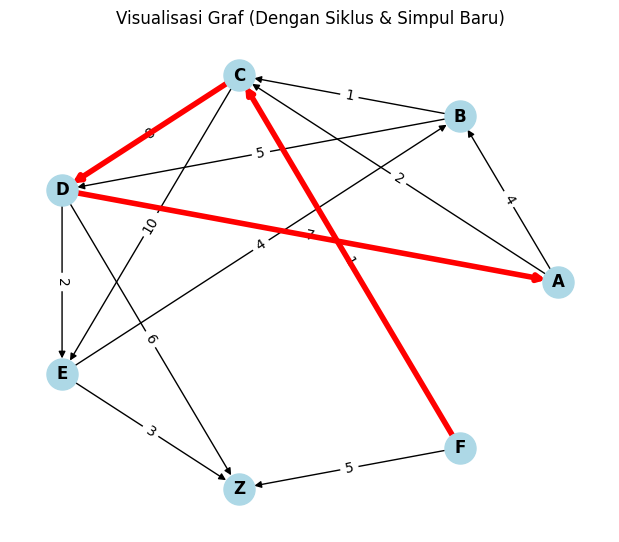

In [7]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.circular_layout(G)  # Ganti tata letak di sini
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)

    plt.title("Visualisasi Graf (Dengan Siklus & Simpul Baru)")
    plt.axis('off')
    plt.show()

# Definisi graf dengan siklus dan simpul baru
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6, 'A': 7},  # Siklus D -> A
    'E': {'Z': 3, 'B': 4},          # Siklus E -> B
    'F': {'C': 1, 'Z': 5},          # Simpul baru F
    'Z': {}
}

start_node = 'F'   # Mulai dari simpul baru
end_node = 'A'
distances, previous = dijkstra_with_paths(graph, start_node)

shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}\n")

visualize_graph(graph, path=shortest_path)